In [1]:
import torch
import torch.optim as optim
from torchvision import transforms, models, datasets
import torch.nn as nn
from torch.utils.data import DataLoader

# Data transformations for training and testing
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform_test, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Load pre-trained ResNet-50 and adjust for CIFAR-10
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss:.4f}, Accuracy: {train_accuracy:.2f}%")

# Testing the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


100%|██████████| 170M/170M [00:54<00:00, 3.11MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\ragha/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:28<00:00, 3.59MB/s]


Epoch [1/20], Loss: 897.6927, Accuracy: 61.70%
Epoch [2/20], Loss: 598.9271, Accuracy: 75.63%
Epoch [3/20], Loss: 516.8347, Accuracy: 78.74%
Epoch [4/20], Loss: 468.9169, Accuracy: 80.86%
Epoch [5/20], Loss: 434.1685, Accuracy: 81.93%
Epoch [6/20], Loss: 406.8776, Accuracy: 83.27%
Epoch [7/20], Loss: 390.6177, Accuracy: 83.94%
Epoch [8/20], Loss: 367.5088, Accuracy: 84.95%
Epoch [9/20], Loss: 350.3912, Accuracy: 85.71%
Epoch [10/20], Loss: 340.5278, Accuracy: 86.07%
Epoch [11/20], Loss: 332.7092, Accuracy: 86.09%
Epoch [12/20], Loss: 309.7546, Accuracy: 87.18%
Epoch [13/20], Loss: 297.2500, Accuracy: 87.67%
Epoch [14/20], Loss: 292.6276, Accuracy: 87.89%
Epoch [15/20], Loss: 291.9179, Accuracy: 87.83%
Epoch [16/20], Loss: 287.9914, Accuracy: 88.14%
Epoch [17/20], Loss: 271.0509, Accuracy: 88.67%
Epoch [18/20], Loss: 242.9823, Accuracy: 89.83%
Epoch [19/20], Loss: 259.1886, Accuracy: 89.30%
Epoch [20/20], Loss: 239.6660, Accuracy: 89.97%
Test Accuracy: 87.61%


In [2]:
torch.save(model.state_dict() , "CIFAR-10.pth")

In [3]:
print(train_dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


C:\Users\ragha\AppData\Local\Temp\ipykernel_25288\1606532713.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("CIFAR-10.pth"))


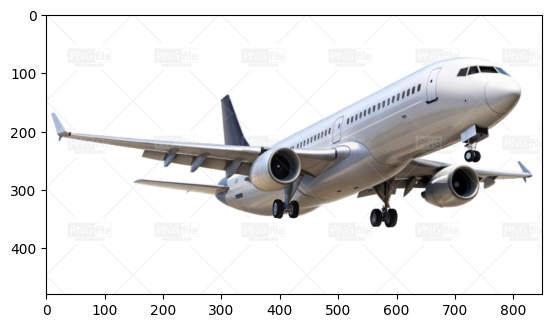

Predicted Class: airplane


In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path =  "C:/Users/ragha/Downloads/aeroplane.png"  # Replace with the image path
image = Image.open(image_path).convert('RGB')

model.load_state_dict(torch.load("CIFAR-10.pth"))
model.to(device)  # Ensure the model is on the correct device

# Show the image
plt.imshow(image)
plt.axis('on')
plt.show()

# Preprocessing to match the model's input requirements
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to CIFAR-10 image size
    transforms.ToTensor(),
    
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Apply transformations and add batch dimension
image_tensor = transform(image).unsqueeze(0).to(device)

# Set model to evaluation mode
model.eval()

# Make prediction
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

# Map predicted class to CIFAR-10 label
classes = ['airplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predicted_label = classes[predicted_class.item()]
print(f"Predicted Class: {predicted_label}")


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define dataset without normalization
transform = transforms.Compose([
    transforms.Resize((224 , 224)),
    transforms.ToTensor()  # Convert images to tensors
])

dataset = datasets.ImageFolder(root=  "C:/Users/ragha/Downloads/train", transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=2)

# Function to calculate mean and std
def calculate_mean_std(loader):
    mean = 0.0
    std = 0.0
    total_samples = 0

    for images, _ in loader:
        
        # Batch dimensions: (batch_size, channels, height, width)
        batch_samples = images.size(0)  # Number of images in the batch
        images = images.view(batch_samples, images.size(1), -1)  # Flatten HxW
        mean += images.mean(2).sum(0)  # Sum mean of all channels
        std  += images.std(2).sum(0)  # Sum std of all channels
        total_samples += batch_samples
        

    mean /= total_samples
    std /= total_samples
    return mean, std

# Compute mean and std
mean, std = calculate_mean_std(loader)
print("Mean:", mean)
print("Std:", std)


C:\Users\ragha\AppData\Local\Temp\ipykernel_25288\2410123936.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("CIFAR-10.pth"))


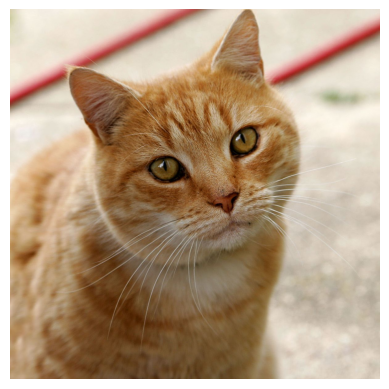

The Predicted Class : cat


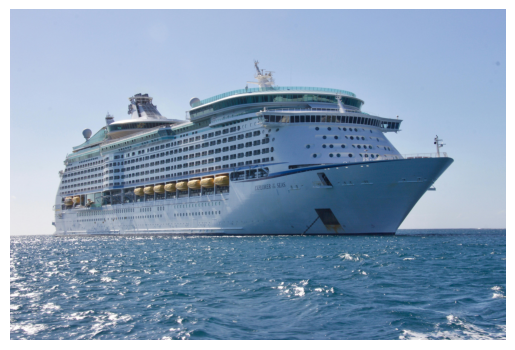

The Predicted Class : ship


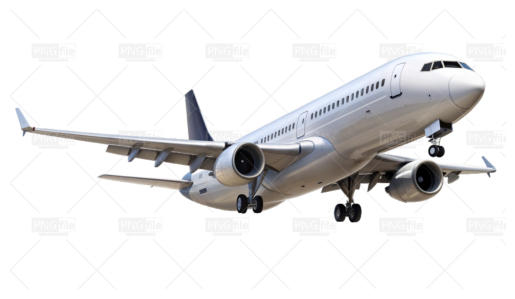

The Predicted Class : aeroplane


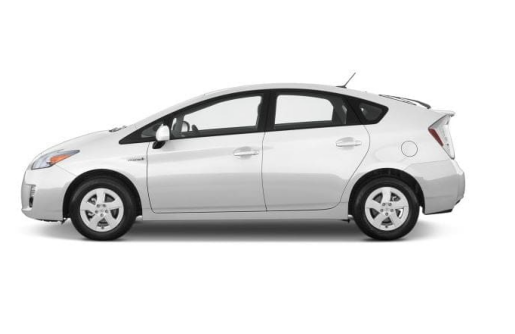

The Predicted Class : automobile


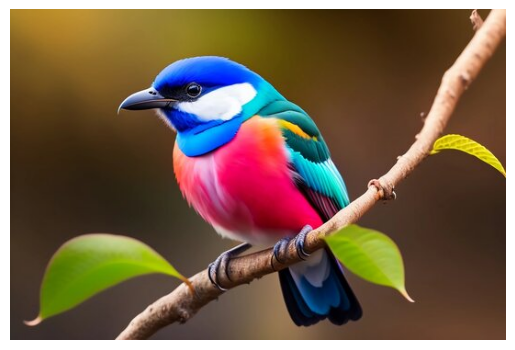

The Predicted Class : bird


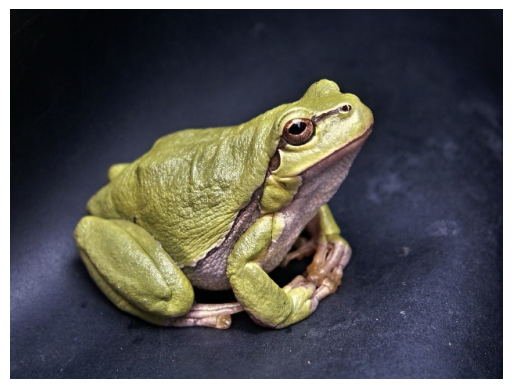

The Predicted Class : frog


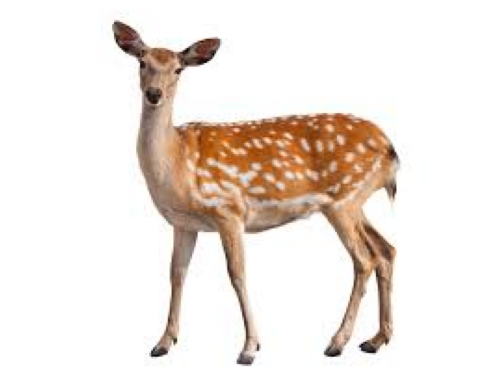

The Predicted Class : deer


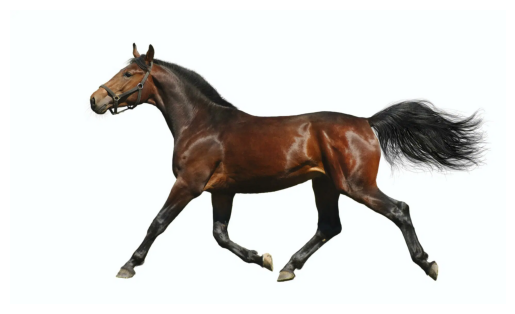

The Predicted Class : horse


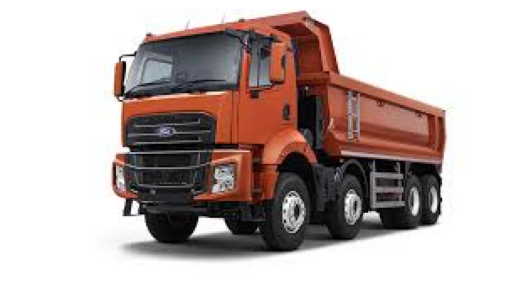

The Predicted Class : truck


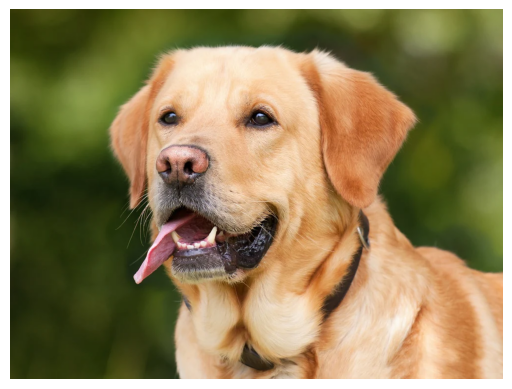

The Predicted Class : dog


In [30]:
from PIL import Image , ImageOps
import matplotlib.pyplot as plt

image_paths = ["C:/Users/ragha/Downloads/Cat03.jpg",
    "C:/Users/ragha/Downloads/ship.jpg",
    "C:/Users/ragha/Downloads/aeroplane.png",
    "C:/Users/ragha/Downloads/automobile.jpg",
    "C:/Users/ragha/Downloads/bird.jpg",
    "C:/Users/ragha/Downloads/frog-2_ver_1.jpg",
    "C:/Users/ragha/Downloads/deer.jpg",
    "C:/Users/ragha/Downloads/horse.webp",
    "C:/Users/ragha/Downloads/truck.jpg",
    "C:/Users/ragha/Downloads/labrador-retriever_1000x.webp"]

transform = transforms.Compose([
      transforms.Resize((32,32)),
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
model.load_state_dict(torch.load("CIFAR-10.pth"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
classes = ['aeroplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for image_path in image_paths:
    image = Image.open(image_path).convert('RGB')
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    image_tensor = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        
       outputs  = model(image_tensor)
       _ , predicted = torch.max(outputs , 1)
    predicted_label = classes[predicted.item()]
    print(f"The Predicted Class : {predicted_label}")   

       
    
